In [67]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model


In [5]:
honey = pd.read_csv('./linearRegression/honeyproduction.csv')

In [7]:
honey.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [6]:
honey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        626 non-null    object 
 1   numcol       626 non-null    float64
 2   yieldpercol  626 non-null    int64  
 3   totalprod    626 non-null    float64
 4   stocks       626 non-null    float64
 5   priceperlb   626 non-null    float64
 6   prodvalue    626 non-null    float64
 7   year         626 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 39.2+ KB


In [21]:
honey['year'].value_counts()

2003    44
2002    44
2001    44
2000    43
1999    43
1998    43
2008    41
2007    41
2006    41
2005    41
2004    41
2012    40
2011    40
2010    40
2009    40
Name: year, dtype: int64

In [29]:
production_per_year = honey.groupby('year').totalprod.mean().reset_index()
production_per_year

,year,totalprod
0,1998,5.105093e+06
1,1999,4.706674e+06
2,2000,5.106000e+06
3,2001,4.221545e+06
4,2002,3.892386e+06
5,2003,4.122091e+06
6,2004,4.456805e+06
7,2005,4.243146e+06
8,2006,3.761902e+06
9,2007,3.600512e+06


In [30]:
X = production_per_year['year']
X

0     1998
1     1999
2     2000
3     2001
4     2002
5     2003
6     2004
7     2005
8     2006
9     2007
10    2008
11    2009
12    2010
13    2011
14    2012
Name: year, dtype: int64

In [33]:
X = X.values.reshape(-1, 1)

In [34]:
X

array([[1998],
       [1999],
       [2000],
       [2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012]], dtype=int64)

In [35]:
y = production_per_year['totalprod']
y

0     5.105093e+06
1     4.706674e+06
2     5.106000e+06
3     4.221545e+06
4     3.892386e+06
5     4.122091e+06
6     4.456805e+06
7     4.243146e+06
8     3.761902e+06
9     3.600512e+06
10    3.974927e+06
11    3.626700e+06
12    4.382350e+06
13    3.680025e+06
14    3.522675e+06
Name: totalprod, dtype: float64

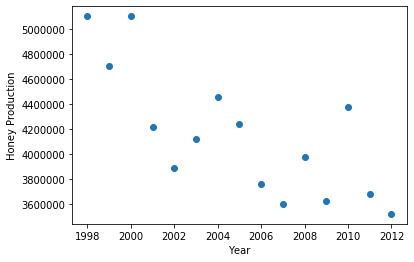

In [37]:
plt.scatter(X, y)
plt.xlabel('Year')
plt.ylabel('Honey Production')
plt.show()

In [39]:
model = linear_model.LinearRegression()


In [40]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
print(model.coef_)
print(model.intercept_)

[-88303.18915238]
181208083.1073298


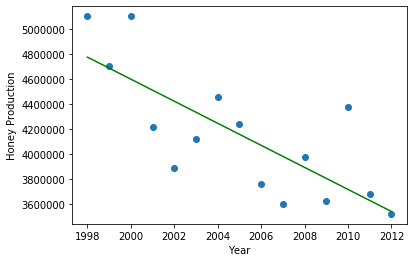

In [47]:
y_pred = model.predict(X)
plt.scatter(X, y)
plt.plot(X, y_pred, 'g')
plt.xlabel('Year')
plt.ylabel('Honey Production')
plt.show()

In [66]:
first_pred = X[0][0] * model.coef_[0] + model.intercept_
print(first_pred)
print(y_pred[0])

4778311.180870682
4778311.180870682


In [65]:
model.intercept_

181208083.1073298

In [72]:
X_beyond = np.array(range(2013, 2021))
X_beyond

array([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [73]:
X_beyond = X_beyond.reshape(-1, 1)

In [74]:
X_beyond

array([[2013],
       [2014],
       [2015],
       [2016],
       [2017],
       [2018],
       [2019],
       [2020]])

In [75]:
y_beyond_pred = model.predict(X_beyond)
print(y_beyond_pred)

[3453763.34358495 3365460.15443256 3277156.96528018 3188853.77612782
 3100550.58697543 3012247.39782304 2923944.20867065 2835641.01951829]


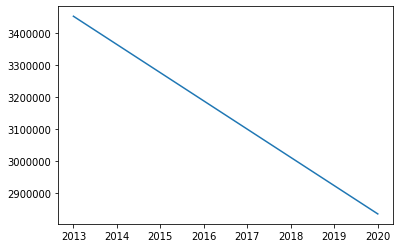

In [76]:
plt.plot(X_beyond, y_beyond_pred)
plt.show()

In [80]:
y_2020_pred = model.predict([[2020]])
print(y_2020_pred[0])
print(y_beyond_pred[-1])

2835641.019518286
2835641.019518286


In [89]:
theta = np.array([1, 2, 3, 4]).reshape(-1, 1)
x = np.array([5, 6, 7, 8]).reshape(-1, 1)

This would not work. Needs to be transposed. 

In [94]:
np.dot(theta, x)

ValueError: shapes (4,1) and (4,1) not aligned: 1 (dim 1) != 4 (dim 0)

In [93]:
y_hat = np.dot(np.transpose(theta), x)

array([[70]])

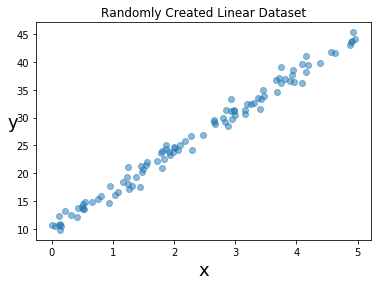

In [116]:
X = 5 * np.random.rand(100, 1)
y = np.random.randn(100, 1) + 10 + 7 * X
plt.scatter(X, y, alpha=0.5)
plt.xlabel('x', fontsize=18)
plt.ylabel('y', rotation=0, fontsize=18)
plt.title('Randomly Created Linear Dataset')
plt.show()

In [112]:
np.c_?

In [113]:
X.shape

(100, 1)

In [117]:
X_c = np.c_[np.ones((100, 1)), X]
X_c[:5]

array([[1.        , 3.71354867],
       [1.        , 3.45346514],
       [1.        , 1.9297006 ],
       [1.        , 2.6516317 ],
       [1.        , 1.37999975]])

In [118]:
theta_best = np.linalg.inv(np.transpose(X_c).dot(X_c)).dot(X_c.T).dot(y)
theta_best

array([[10.23550024],
       [ 6.91507433]])

In [119]:
X_new = np.array([[0], [2]]) # Two random points 
X_new_c = np.c_[np.ones((2,1)), X_new] # Complete version of the feature vector
y_pred = X_new_c.dot(theta_best)
y_pred

array([[10.23550024],
       [24.0656489 ]])

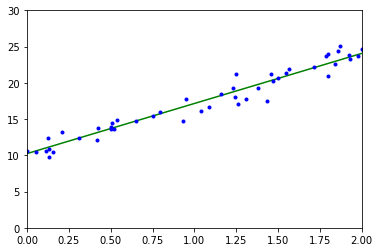

In [121]:
plt.plot(X_new, y_pred, "g-", label="Predictions")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 30])
plt.show()

In [123]:
model = linear_model.LinearRegression()
model.fit(X, y)
print(model.intercept_)
print(model.coef_)
model.predict(X_new)

[10.23550024]
[[6.91507433]]


array([[10.23550024],
       [24.0656489 ]])

<h3>Polynomial Regression</h3>


In [140]:
m = 70
X = 10 * np.random.rand(m, 1) - 5
y = 0.5 * X**2 + 0.8 * X + 6 + np.random.randn(m, 1)

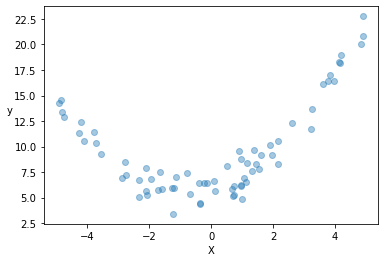

In [141]:
plt.scatter(X, y, alpha=0.4)
plt.ylabel('y', rotation=0)
plt.xlabel('X')
plt.show()

In [148]:
from sklearn.preprocessing import PolynomialFeatures

add_square = PolynomialFeatures(degree=2, include_bias=False)
X_poly = add_square.fit_transform(X)
print(X[0])
print(X_poly[0])

[0.52673758]
[0.52673758 0.27745248]


In [149]:
model = linear_model.LinearRegression()
model.fit(X_poly, y)
print(model.intercept_)
print(model.coef_)


[5.88817551]
[[0.78239595 0.50625183]]


In [159]:
y_new = model.predict(X_poly)

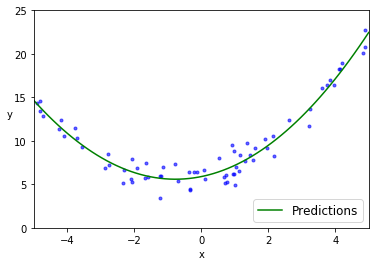

In [168]:
X_new = np.linspace(-5, 5, 70).reshape(70, 1)
X_new_poly = add_square.transform(X_new)
y_new = model.predict(X_new_poly)
plt.plot(X, y, 'b.', alpha=0.6)
plt.plot(X_new, y_new, 'g-', label="Predictions")
plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.legend(loc="lower right", fontsize=12)
plt.axis([-5, 5, 0, 25])
plt.show()